In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
import urllib.request
SUN_URL = "https://websites.umich.edu/~mejn/cp/data/sunspots.txt" 
urllib.request.urlretrieve(SUN_URL, "sunspots.txt")
FNAME = "sunspots.txt"

In [3]:
def load_sunspots(fname):
    arr = np.loadtxt(fname, comments="#")
    month_index = arr[:, 0].astype(int)
    sunspots = arr[:, 1].astype(float)
    return month_index, sunspots

m, s = load_sunspots(FNAME)
N = s.size
print(f"Loaded {N} monthly entries from '{FNAME}'.")

Loaded 3143 monthly entries from 'sunspots.txt'.


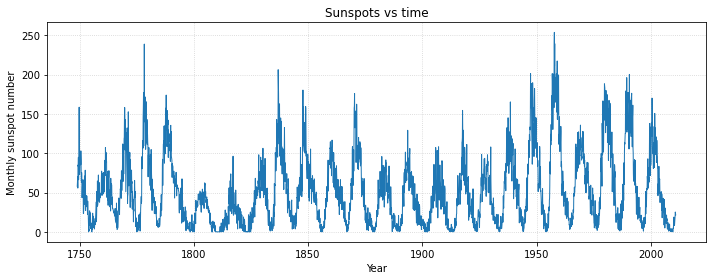

In [4]:
t_years = m / 12.0 + 1749.0 #time in years

plt.figure(figsize=(10, 4))
plt.plot(t_years, s, lw=1.0)
plt.xlabel("Year")
plt.ylabel("Monthly sunspot number")
plt.title("Sunspots vs time")
plt.grid(True, ls=":", alpha=0.6)
plt.tight_layout()
plt.show()

#visually, it looks like each cycle is just over 10 years long 

In [13]:
x = s - np.mean(s)
w = np.hanning(N) 
xw = x * w

freq = np.fft.rfftfreq(N, d=1.0)      # cycles/month
Ck = np.fft.rfft(xw)
power = (np.abs(Ck) ** 2)

k0 = 1 + np.argmax(power[1:])        
f_peak = freq[k0]                     # cycles/month
T_months = 1.0 / f_peak               # months per cycle
T_years = T_months / 12.0

print(f"Dominant nonzero peak:")
print(f"  frequency ≈ {f_peak:.5f} cycles/month")
print(f"  period   ≈ {T_months:.2f} months  (~{T_years:.2f} years)")

Dominant nonzero peak:
  frequency ≈ 0.00764 cycles/month
  period   ≈ 130.96 months  (~10.91 years)


In [34]:
k0

24

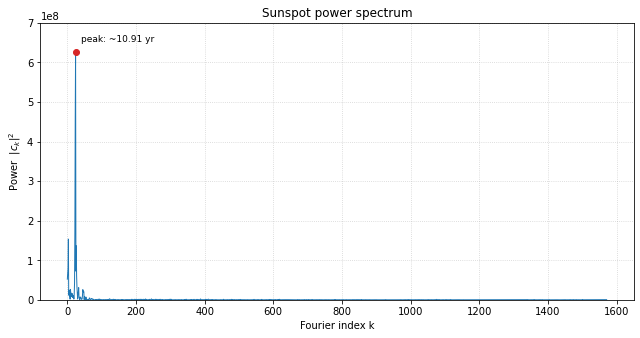

In [17]:
plt.figure(figsize=(9, 4.8))

k_vals = np.arange(power.size) 
plt.plot(k_vals, power, lw=1.0)
plt.scatter([k0], [power[k0]], color="C3", zorder=5, label="peak")
plt.xlabel("Fourier index k")
plt.ylabel(r"Power  $|c_k|^2$")
plt.ylim(0, 7e8)
plt.title("Sunspot power spectrum")
plt.grid(True, ls=":", alpha=0.6)
plt.annotate(f"peak: ~{T_years:.2f} yr",
             xy=(k0, power[k0]),
             xytext=(5, 10), textcoords="offset points",
             fontsize=9)

plt.tight_layout()
plt.show()

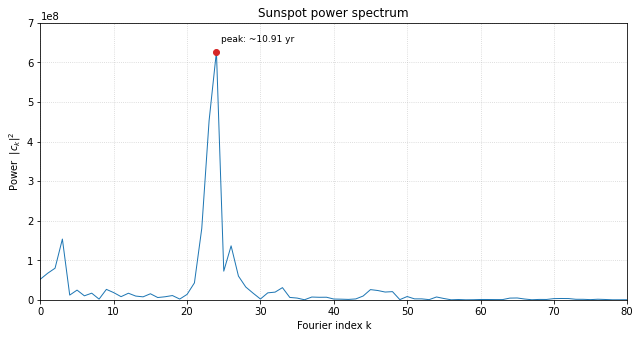

In [20]:
plt.figure(figsize=(9, 4.8))

#zoomed in plot
k_vals = np.arange(power.size)  
plt.plot(k_vals, power, lw=1.0)
plt.scatter([k0], [power[k0]], color="C3", zorder=5, label="peak")
plt.xlabel("Fourier index k")
plt.ylabel(r"Power  $|c_k|^2$")
plt.ylim(0, 7e8)
plt.xlim(0, 80)
plt.title("Sunspot power spectrum")
plt.grid(True, ls=":", alpha=0.6)
plt.annotate(f"peak: ~{T_years:.2f} yr",
             xy=(k0, power[k0]),
             xytext=(5, 10), textcoords="offset points",
             fontsize=9)

plt.tight_layout()
plt.show()

In [21]:
DOW_URL = "https://websites.umich.edu/~mejn/cp/data/dow.txt" 
urllib.request.urlretrieve(DOW_URL, "dow.txt")

In [22]:
def load_dow(fname: str):
    x = np.loadtxt(fname, dtype=float)
    N = x.size
    t = np.arange(N, dtype=int)
    return t, x

t,x = load_dow("dow.txt")

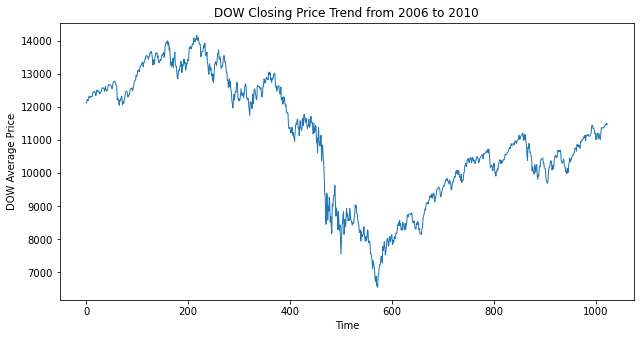

In [24]:
plt.figure(figsize=(9, 4.8))
plt.plot(t, x, lw=1.0)
plt.xlabel("Time in days")
plt.ylabel("DOW Average Price")
plt.title("DOW Closing Price Trend from 2006 to 2010")
plt.tight_layout()
plt.show()

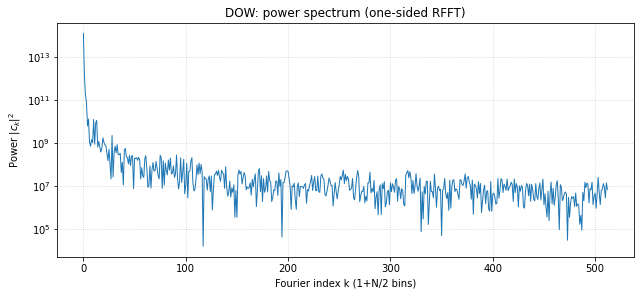

In [26]:
N = len(x)

# Real FFT (one-sided spectrum for real signals): bins k = 0..N//2
C = np.fft.rfft(x)               
power = np.abs(C)**2              
k = np.arange(C.size)          

plt.figure(figsize=(9, 4.2))
plt.semilogy(k, power, lw=1.0)
plt.xlabel("Fourier index k (1+N/2 bins)")
plt.ylabel(r"Power $|c_k|^2$")
plt.title("DOW: power spectrum (one-sided RFFT)")
plt.grid(True, ls=":", alpha=0.6)
plt.tight_layout()
plt.show()

In [29]:
keep_frac = 0.10
Nr = C.size                                  
k_keep = int(np.ceil(keep_frac * Nr))       

C10 = np.zeros_like(C)
C10[:k_keep] = C[:k_keep]       

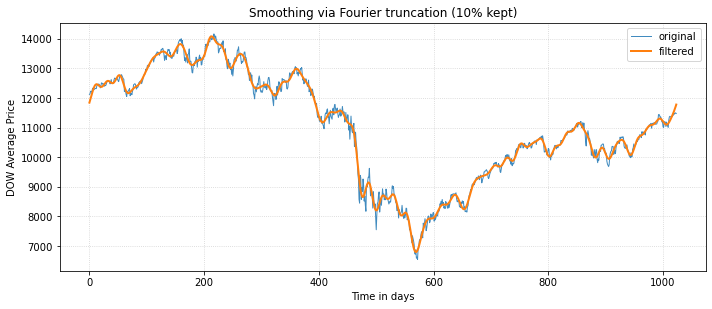

In [30]:
y10 = np.fft.irfft(C10, n=N)            

plt.figure(figsize=(10, 4.4))
plt.plot(t, x,   lw=1.0, label="original", alpha=0.85)
plt.plot(t, y10, lw=2.0, label="filtered (10%)")
plt.xlabel("Time in days")
plt.ylabel("DOW Average Price")
plt.title("Smoothing via Fourier truncation (10% kept)")
plt.grid(True, ls=":", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


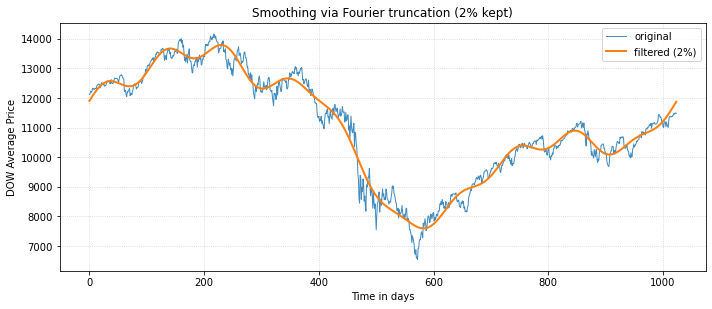

In [33]:
keep_frac2 = 0.02
k_keep2 = int(np.ceil(keep_frac2 * Nr))

C02 = np.zeros_like(C)
C02[:k_keep2] = C[:k_keep2]
y02 = np.fft.irfft(C02, n=N)

plt.figure(figsize=(10, 4.4))
plt.plot(t, x,   lw=1.0, label="original", alpha=0.85)
plt.plot(t, y02, lw=2.0, label="filtered (2%)")
plt.xlabel("Time in days")
plt.ylabel("DOW Average Price")
plt.title("Smoothing via Fourier truncation (2% kept)")
plt.grid(True, ls=":", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [35]:
import urllib.request
BLUR_URL = "https://websites.umich.edu/~mejn/cp/data/blur.txt" 
urllib.request.urlretrieve(BLUR_URL, "blur.txt")

('blur.txt', <http.client.HTTPMessage at 0x7fd7493bf040>)

In [37]:
def load_blurred_grid(fname="blur.txt"):
    A = np.loadtxt(fname, dtype=float)
    return A

In [38]:
def show_image(img, title="", cmap="gray", origin="upper", vauto=True, vrange=None):
    if vauto and vrange is None:
        lo, hi = np.percentile(img, [1, 99])
        vrange = (lo, hi)
    plt.figure(figsize=(5.5, 5.0))
    plt.imshow(img, cmap=cmap, origin=origin, vmin=None if vrange is None else vrange[0],
               vmax=None if vrange is None else vrange[1])
    plt.colorbar(shrink=0.8)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [39]:
def periodic_gaussian_psf(shape, sigma):
    ny, nx = shape
    y = np.arange(ny)
    x = np.arange(nx)
    X, Y = np.meshgrid(x, y)
    xc, yc = (nx - 1) / 2.0, (ny - 1) / 2.0 

    Gc = np.exp(-((X - xc)**2 + (Y - yc)**2) / (2.0 * sigma**2))
    Gc /= np.sum(Gc) + 1e-16  # normalise

    G0 = np.fft.ifftshift(Gc)
    return G0

In [48]:
def deblur_division(blurred, psf, eps_rel=1e-3):
    B = np.fft.rfft2(blurred)
    H = np.fft.rfft2(psf)

    eps = eps_rel * np.max(np.abs(H))
    mask = (np.abs(H) >= eps)

    Xhat = np.zeros_like(B, dtype=complex)
    Xhat[mask] = B[mask] / H[mask] 

    recovered = np.fft.irfft2(Xhat, s=blurred.shape)

    return recovered, dict(eps=eps, kept_frac=np.mean(mask))

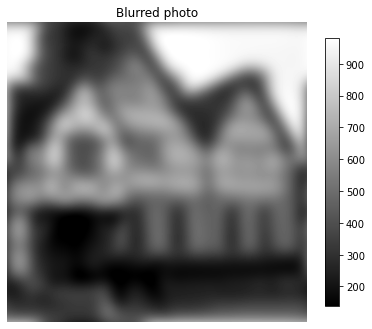

In [52]:
blur = load_blurred_grid("blur.txt")
show_image(blur, title="Blurred photo", origin="upper")
ORIGIN = "upper" 

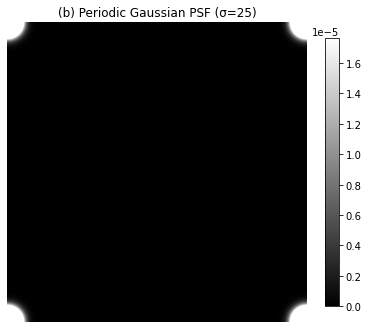

In [50]:
sigma = 25.0
psf = periodic_gaussian_psf(blur.shape, sigma=sigma)
show_image(psf, title="(b) Periodic Gaussian PSF (σ=25)", origin=ORIGIN)

(c) Division threshold eps = 1.000e-03 (relative 0.001 of max|H|)
(c) Frequency bins used (|H| >= eps): 0.2%


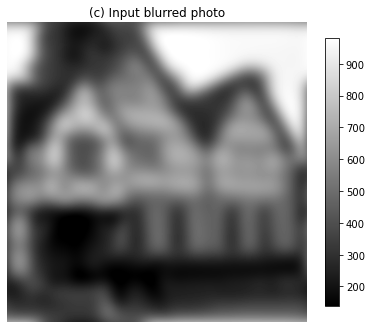

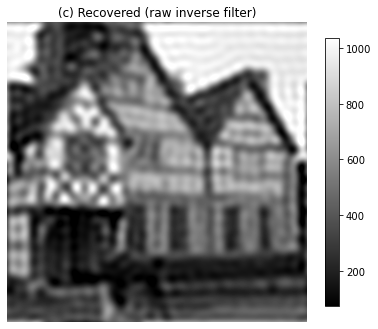

In [51]:
recovered, info = deblur_division(blur, psf, eps_rel=1e-3)

print(f"(c) Division threshold eps = {info['eps']:.3e} (relative {1e-3} of max|H|)")
print(f"(c) Frequency bins used (|H| >= eps): {info['kept_frac']*100:.1f}%")

show_image(blur,           title="(c) Input blurred photo",                origin=ORIGIN)
show_image(recovered,      title="(c) Recovered (raw inverse filter)",     origin=ORIGIN)